In [56]:
import pandas as pd
import numpy as np
import matplotlib as plt
import configparser 


In [57]:
config = configparser.ConfigParser()
config.read('Config.cfg')


['Config.cfg']

In [58]:
config.get('RDS2','DB_HOST')

'database-flights-demo.c9m6kkqsitv4.us-east-2.rds.amazonaws.com'

In [59]:
import mysql.connector

# Establish a connection to your MySQL database
conn = mysql.connector.connect(
    host=config.get('RDS2', 'DB_HOST'),
    port=config.getint('RDS2', 'DB_PORT'),
    user=config.get('RDS2', 'DB_USERNAME'),
    password=config.get('RDS2', 'DB_PASSWORD'),
    database=config.get('RDS2', 'DB_NAME')
)

# Create a cursor to execute SQL queries
cursor = conn.cursor

In [60]:
mysql_driver2 = f"""mysql+pymysql://{config.get('RDS2', 'DB_USERNAME')}:{config.get('RDS2', 'DB_PASSWORD')}@{config.get('RDS2', 'DB_HOST')}:{config.get('RDS2', 'DB_PORT')}/{config.get('RDS2', 'DB_NAME')}"""

### Carga de datos 

In [61]:
airlines_data = pd.read_csv('C:\\Users\\juanp\\Desktop\\Python\\Clases Python CD\\data\\airlines.csv')
airlines_data.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [62]:
airports_data = pd.read_csv('C:\\Users\\juanp\\Desktop\\Python\\Clases Python CD\\data\\airports.csv')
airports_data

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [119]:
flights_data = pd.read_csv('C:\\Users\\juanp\\Desktop\\Python\\Clases Python CD\\data\\flights.csv')
flights_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


In [ ]:
planes_data = pd.read_csv('C:\\Users\\juanp\\Desktop\\Python\\Clases Python CD\\data\\planes.csv')
planes_data.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [ ]:
weather_data = pd.read_csv('C:\\Users\\juanp\\Desktop\\Python\\Clases Python CD\\data\\weather.csv')
weather_data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


### Poblar tablas en SQL

In [ ]:
airlines_data.to_sql('airlines', mysql_driver2, index=False, if_exists='append')

In [ ]:
planes_data.to_sql('planes', mysql_driver2, index=False, if_exists='append')

In [ ]:
airports_data.to_sql('airport', mysql_driver2, index=False, if_exists='append')

In [ ]:
weather_data.to_sql('weather', mysql_driver2, index=False, if_exists='append')

In [ ]:
flights_data.to_sql('flights', mysql_driver2, index=False, if_exists='append')

In [192]:
sql_query= 'Select tailnum,year from planes'
df_planes= pd.read_sql(sql_query,conn)
df_planes

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3557819806.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_planes= pd.read_sql(sql_query,conn)


,tailnum,year
0,N10156,2004
1,N102UW,1998
2,N103US,1999
3,N104UW,1999
4,N10575,2002
...,...,...
3317,N997AT,2002
3318,N997DL,1992
3319,N998AT,2002
3320,N998DL,1992


In [ ]:
sql_query= 'Select origin, dest,tailnum from flights'
df_flights= pd.read_sql(sql_query,conn)
df_flights.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\950710197.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_flights= pd.read_sql(sql_query,conn)


,origin,dest,tailnum
0,EWR,IAH,N14228
1,LGA,IAH,N24211
2,JFK,MIA,N619AA
3,JFK,BQN,N804JB
4,LGA,ATL,N668DN


### Merge planes,flights

In [ ]:
# Assuming you have already merged df_planes and df_flights into df_planes_flights
df_planes_flights = df_planes.merge(df_flights, left_on='tailnum', right_on='tailnum', how='inner')

# Reset the index and rename the index column
df_planes_flights.reset_index(inplace=True)
df_planes_flights.rename(columns={'index': 'ID'}, inplace=True)

# Print the first few rows of the merged DataFrame
print(df_planes_flights.head())


   ID tailnum origin dest
0   0  N10156    EWR  PIT
1   1  N10156    EWR  CHS
2   2  N10156    EWR  MSP
3   3  N10156    EWR  CMH
4   4  N10156    EWR  MCI


In [ ]:
total_landings=len(df_planes_flights)
total_landings

284170

In [ ]:
total_planes = df_planes_flights.groupby('tailnum').size()
total_planes

tailnum
N10156    153
N102UW     48
N103US     46
N104UW     47
N10575    289
         ... 
N997AT     44
N997DL     63
N998AT     26
N998DL     77
N999DN     61
Length: 3322, dtype: int64

In [ ]:

total_dest= df_planes_flights['dest'].value_counts()
total_dest

LAX    15516
ATL    14673
BOS    13683
MCO    13234
SFO    12767
       ...  
HDN       14
MTJ       12
SBN       10
ANC        6
LEX        1
Name: dest, Length: 104, dtype: int64

In [ ]:
porcentaje_planes= (total_dest/total_landings)*100
porcentaje_planes

LAX    5.460112
ATL    5.163458
BOS    4.815075
MCO    4.657071
SFO    4.492733
         ...   
HDN    0.004927
MTJ    0.004223
SBN    0.003519
ANC    0.002111
LEX    0.000352
Name: dest, Length: 104, dtype: float64

In [ ]:
airports_data['tzone'].value_counts()

America/New_York       519
America/Chicago        342
America/Anchorage      239
America/Los_Angeles    176
America/Denver         119
America/Phoenix         38
Pacific/Honolulu        18
America/Vancouver        2
Asia/Chongqing           2
Name: tzone, dtype: int64

In [71]:
sql_query= 'Select tzone, faa, name from airport'
df_airports= pd.read_sql(sql_query,conn)
df_airports.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\1112227935.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_airports= pd.read_sql(sql_query,conn)


,tzone,faa,name
0,America/New_York,04G,Lansdowne Airport
1,America/Chicago,06A,Moton Field Municipal Airport
2,America/Chicago,06C,Schaumburg Regional
3,America/New_York,06N,Randall Airport
4,America/New_York,09J,Jekyll Island Airport


In [ ]:
total_airports = df_airports['tzone'].str.contains('America').value_counts()

print(total_airports)


True     1435
False      20
Name: tzone, dtype: int64


In [ ]:
df_planes_flights_airport = df_planes_flights.merge(df_airports, left_on='dest', right_on='faa', how='left')
df_planes_flights_airport

,ID,tailnum,origin,dest,tzone,faa
0,0,N10156,EWR,PIT,America/New_York,PIT
1,1,N10156,EWR,CHS,America/New_York,CHS
2,2,N10156,EWR,MSP,America/Chicago,MSP
3,3,N10156,EWR,CMH,America/New_York,CMH
4,4,N10156,EWR,MCI,America/Chicago,MCI
...,...,...,...,...,...,...
284165,284165,N999DN,LGA,ATL,America/New_York,ATL
284166,284166,N999DN,LGA,ATL,America/New_York,ATL
284167,284167,N999DN,LGA,ATL,America/New_York,ATL
284168,284168,N999DN,LGA,ATL,America/New_York,ATL


In [ ]:
df_planes_flights_airport = df_planes_flights_airport.drop('ID', axis=1)



In [ ]:
df_planes_flights_airport

,tailnum,origin,dest,tzone,faa
0,N10156,EWR,PIT,America/New_York,PIT
1,N10156,EWR,CHS,America/New_York,CHS
2,N10156,EWR,MSP,America/Chicago,MSP
3,N10156,EWR,CMH,America/New_York,CMH
4,N10156,EWR,MCI,America/Chicago,MCI
...,...,...,...,...,...
284165,N999DN,LGA,ATL,America/New_York,ATL
284166,N999DN,LGA,ATL,America/New_York,ATL
284167,N999DN,LGA,ATL,America/New_York,ATL
284168,N999DN,LGA,ATL,America/New_York,ATL


In [ ]:
total_landings_airp= df_planes_flights_airport['tzone'].value_counts()
total_landings_airp

America/New_York       162022
America/Chicago         57096
America/Los_Angeles     43608
America/Denver           9944
America/Phoenix          4596
Pacific/Honolulu          705
America/Anchorage           6
Name: tzone, dtype: int64

In [ ]:
Porcentaje_landings= total_landings_airp/total_landings*100
Porcentaje_landings

America/New_York       57.015871
America/Chicago        20.092198
America/Los_Angeles    15.345744
America/Denver          3.499314
America/Phoenix         1.617342
Pacific/Honolulu        0.248091
America/Anchorage       0.002111
Name: tzone, dtype: float64

In [ ]:
total_landings_plane= df_planes_flights_airport['tailnum'].value_counts()
total_landings_plane

N711MQ    486
N258JB    427
N298JB    407
N353JB    404
N351JB    402
         ... 
N772SK      1
N701SK      1
N834MH      1
N206UA      1
N627AW      1
Name: tailnum, Length: 3322, dtype: int64

In [ ]:
porcentaje_planes=total_landings_plane/total_landings
porcentaje_planes

N711MQ    0.001710
N258JB    0.001503
N298JB    0.001432
N353JB    0.001422
N351JB    0.001415
            ...   
N772SK    0.000004
N701SK    0.000004
N834MH    0.000004
N206UA    0.000004
N627AW    0.000004
Name: tailnum, Length: 3322, dtype: float64

In [ ]:
df_planes_group = df_planes_flights_airport.groupby('tailnum').value_counts()
df_planes_group

tailnum  origin  dest  tzone             faa
N10156   EWR     MCI   America/Chicago   MCI    15
                 MSP   America/Chicago   MSP    14
                 OMA   America/Chicago   OMA    12
                 CHS   America/New_York  CHS    10
                 BNA   America/Chicago   BNA     6
                                                ..
N999DN   JFK     TPA   America/New_York  TPA     2
         LGA     PBI   America/New_York  PBI     2
                 SRQ   America/New_York  SRQ     1
         EWR     ATL   America/New_York  ATL     1
         LGA     TPA   America/New_York  TPA     1
Length: 45345, dtype: int64

In [ ]:
df_planes_group2=df_planes_group.groupby('tailnum').sum()
df_planes_group2

tailnum
N10156    153
N102UW     48
N103US     46
N104UW     47
N10575    289
         ... 
N997AT     44
N997DL     63
N998AT     26
N998DL     77
N999DN     61
Length: 3322, dtype: int64

In [ ]:
df_planes_group2.sum()

277977

In [ ]:
sql_query= 'SELECT temp,dewp,humid,origin,wind_speed,pressure from weather'
df_weather= pd.read_sql(sql_query,conn)
df_weather.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\1147177698.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_weather= pd.read_sql(sql_query,conn)


,temp,dewp,humid,origin,wind_speed,pressure
0,39.02,26.06,59.37,EWR,10.35700,1012.0
1,39.02,26.96,61.63,EWR,8.05546,1012.3
2,39.02,28.04,64.43,EWR,11.50780,1012.5
3,39.92,28.04,62.21,EWR,12.65860,1012.2
4,39.02,28.04,64.43,EWR,12.65860,1011.9


In [105]:
df_we_air=df_airports.merge(df_weather, left_on= 'faa', right_on='origin',how='inner')
df_we_air

,tzone,faa,name,temp,dewp,humid,origin,wind_speed,pressure
0,America/New_York,EWR,Newark Liberty Intl,39.02,26.06,59.37,EWR,10.35700,1012.0
1,America/New_York,EWR,Newark Liberty Intl,39.02,26.96,61.63,EWR,8.05546,1012.3
2,America/New_York,EWR,Newark Liberty Intl,39.02,28.04,64.43,EWR,11.50780,1012.5
3,America/New_York,EWR,Newark Liberty Intl,39.92,28.04,62.21,EWR,12.65860,1012.2
4,America/New_York,EWR,Newark Liberty Intl,39.02,28.04,64.43,EWR,12.65860,1011.9
...,...,...,...,...,...,...,...,...,...
26110,America/New_York,LGA,La Guardia,35.96,19.94,51.78,LGA,13.80940,1017.1
26111,America/New_York,LGA,La Guardia,33.98,17.06,49.51,LGA,17.26170,1018.8
26112,America/New_York,LGA,La Guardia,32.00,15.08,49.19,LGA,14.96010,1019.5
26113,America/New_York,LGA,La Guardia,30.92,12.92,46.74,LGA,17.26170,1019.9


In [ ]:
idx_max_temp = df_we_air['temp'].idxmax()
faa_max_temp_airport = df_we_air.loc[idx_max_temp, 'faa']
faa_max_temp_airport

'EWR'

In [ ]:
sql_query='SELECT * FROM airlines'
df_aero= pd.read_sql(sql_query,conn)
df_aero

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\1131114651.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_aero= pd.read_sql(sql_query,conn)


,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [ ]:
sql_query= 'Select carrier, flight,origin,dest from flights'
df_flights2= pd.read_sql(sql_query,conn)
df_flights2.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\2941285353.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_flights2= pd.read_sql(sql_query,conn)


,carrier,flight,origin,dest
0,UA,1545,EWR,IAH
1,UA,1714,LGA,IAH
2,AA,1141,JFK,MIA
3,B6,725,JFK,BQN
4,DL,461,LGA,ATL


In [177]:
df_air_flight=df_aero.merge(df_flights2, left_on='carrier',right_on='carrier',how='inner')
df_air_flight

,carrier,name,flight,origin,dest
0,9E,Endeavor Air Inc.,3538,JFK,MSP
1,9E,Endeavor Air Inc.,4105,JFK,IAD
2,9E,Endeavor Air Inc.,3295,JFK,BUF
3,9E,Endeavor Air Inc.,3843,JFK,SYR
4,9E,Endeavor Air Inc.,3792,JFK,ROC
...,...,...,...,...,...
336771,YV,Mesa Airlines Inc.,3771,LGA,IAD
336772,YV,Mesa Airlines Inc.,2751,LGA,CLT
336773,YV,Mesa Airlines Inc.,3771,LGA,IAD
336774,YV,Mesa Airlines Inc.,2751,LGA,CLT


In [ ]:
Total_fliXaero= df_air_flight.groupby('carrier').value_counts()
Total_sum_aeroXfl=Total_fliXaero.groupby('carrier').sum()
Total_sum_aeroXfl

carrier
9E    18460
AA    32729
AS      714
B6    54635
DL    48110
EV    54173
F9      685
FL     3260
HA      342
MQ    26397
OO       32
UA    58665
US    20536
VX     5162
WN    12275
YV      601
dtype: int64

In [ ]:
# Group by 'carrier' and 'Name', then count the values
Total_fliXaero = df_air_flight.groupby(['carrier', 'name']).size()

# Sum up the counts for each 'carrier' and 'Name'
Total_sum_aeroXfl = Total_fliXaero.groupby(level=[0,1]).sum()

print(Total_sum_aeroXfl)


carrier  name                       
9E       Endeavor Air Inc.              18460
AA       American Airlines Inc.         32729
AS       Alaska Airlines Inc.             714
B6       JetBlue Airways                54635
DL       Delta Air Lines Inc.           48110
EV       ExpressJet Airlines Inc.       54173
F9       Frontier Airlines Inc.           685
FL       AirTran Airways Corporation     3260
HA       Hawaiian Airlines Inc.           342
MQ       Envoy Air                      26397
OO       SkyWest Airlines Inc.             32
UA       United Air Lines Inc.          58665
US       US Airways Inc.                20536
VX       Virgin America                  5162
WN       Southwest Airlines Co.         12275
YV       Mesa Airlines Inc.               601
dtype: int64


In [ ]:
# Group by 'carrier' and 'Name', then count the values
Total_fliXaero = df_air_flight.groupby(['carrier', 'name']).size()

# Sum up the counts for each 'carrier' and 'Name'
Total_sum_aeroXfl = Total_fliXaero.groupby(level=[0,1]).sum()

# Convert the Series to a DataFrame and rename the column
Total_sum_aeroXfl = Total_sum_aeroXfl.reset_index(name='# flights')

print(Total_sum_aeroXfl)


   carrier                         name  # flights
0       9E            Endeavor Air Inc.      18460
1       AA       American Airlines Inc.      32729
2       AS         Alaska Airlines Inc.        714
3       B6              JetBlue Airways      54635
4       DL         Delta Air Lines Inc.      48110
5       EV     ExpressJet Airlines Inc.      54173
6       F9       Frontier Airlines Inc.        685
7       FL  AirTran Airways Corporation       3260
8       HA       Hawaiian Airlines Inc.        342
9       MQ                    Envoy Air      26397
10      OO        SkyWest Airlines Inc.         32
11      UA        United Air Lines Inc.      58665
12      US              US Airways Inc.      20536
13      VX               Virgin America       5162
14      WN       Southwest Airlines Co.      12275
15      YV           Mesa Airlines Inc.        601


In [ ]:
# Assuming 'df' is your DataFrame
max_flights_row = Total_sum_aeroXfl.loc[Total_sum_aeroXfl['# flights'].idxmax()]

print(max_flights_row)


carrier                         UA
name         United Air Lines Inc.
# flights                    58665
Name: 11, dtype: object


In [ ]:
sql_query= 'Select tailnum, distance from flights'
df_flights3= pd.read_sql(sql_query,conn)
df_flights3.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\2224932428.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_flights3= pd.read_sql(sql_query,conn)


,tailnum,distance
0,N14228,1400
1,N24211,1416
2,N619AA,1089
3,N804JB,1576
4,N668DN,762


In [ ]:
group_flights= df_flights3.groupby('tailnum').agg(['mean','median','min','max','std'])
group_flights.columns=['Media','Mediana','Minimo','Maximo','STD']
group_flights.head()

,Media,Mediana,Minimo,Maximo,STD
tailnum,,,,,
D942DN,854.500000,853.0,762,950,106.837883
N0EGMQ,676.188679,719.0,213,1147,199.956176
N10156,757.947712,746.0,116,1325,332.057299
N102UW,535.875000,541.0,529,544,6.749704
N103US,535.195652,529.0,529,544,6.615200


Número de filas: 26115
Número de columnas: 15
Variables categóricas: Index(['origin', 'time_hour'], dtype='object')
Variables continuas: Index(['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib'],
      dtype='object')
Variables discretas: Index(['year', 'month', 'day', 'hour'], dtype='object')
Variables de fecha y hora: Index([], dtype='object')


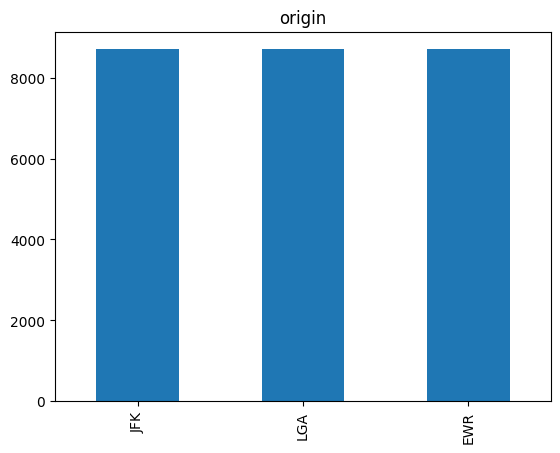

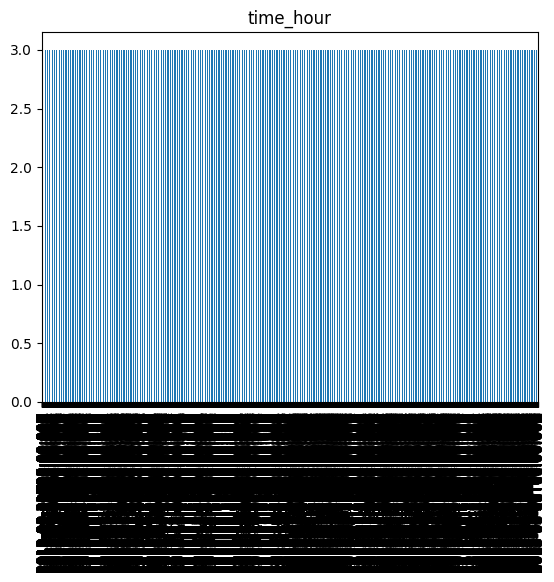

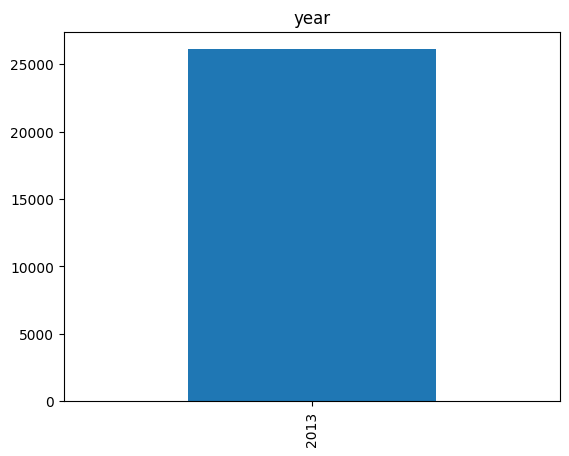

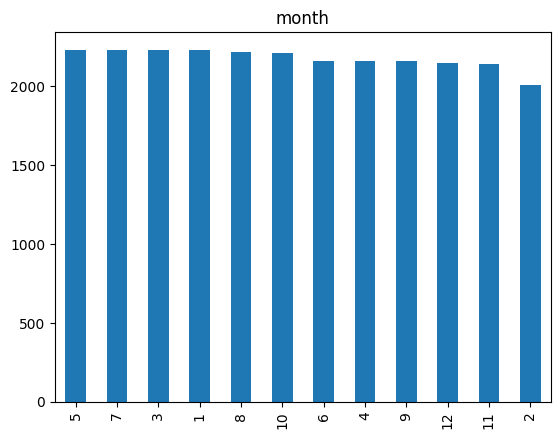

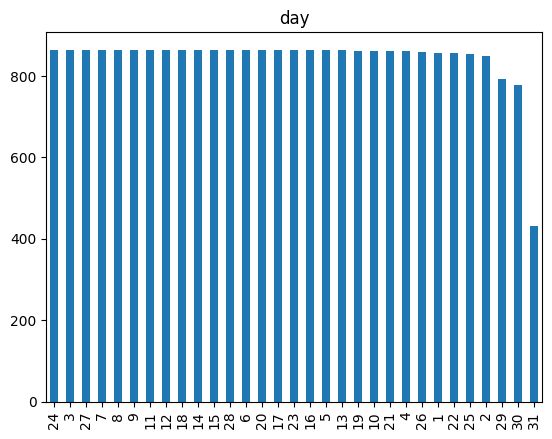

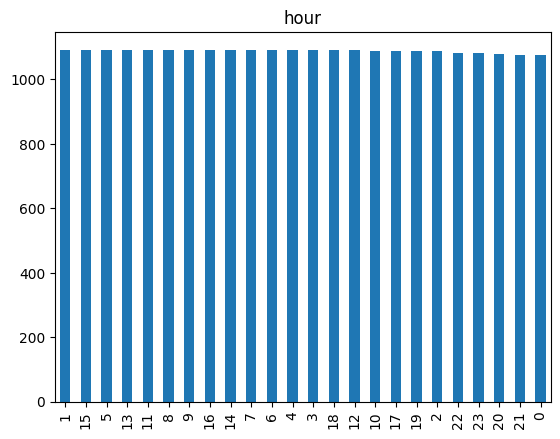

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


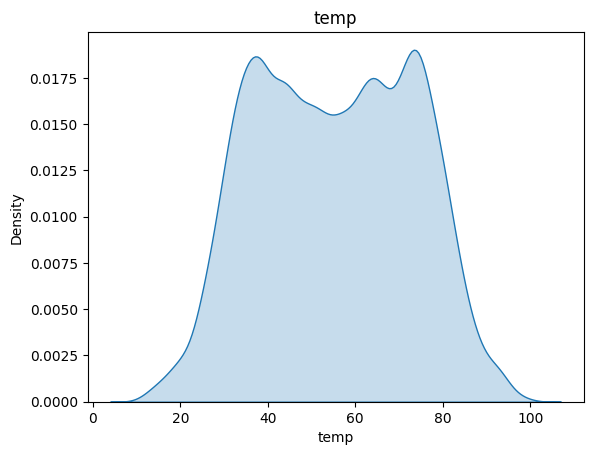

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


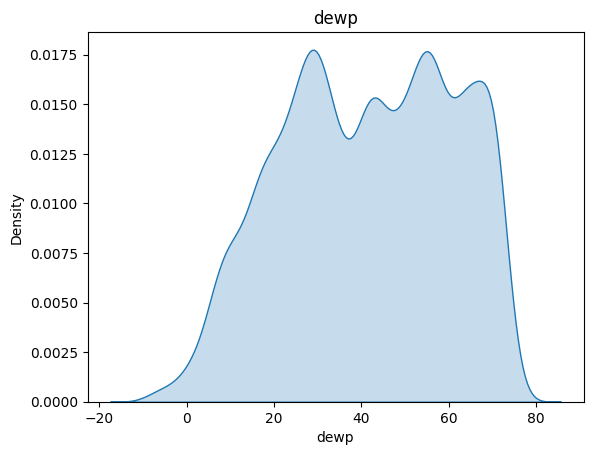

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


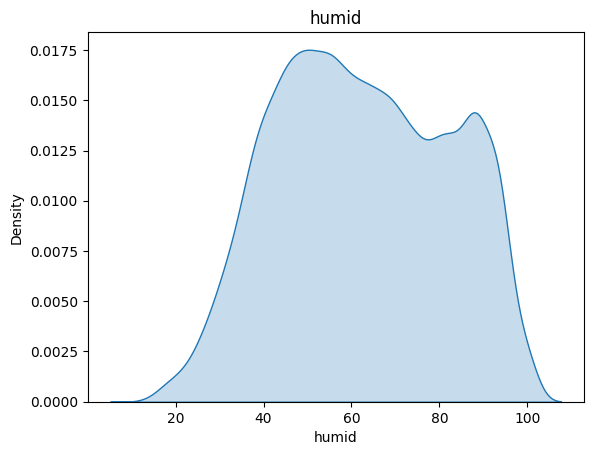

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


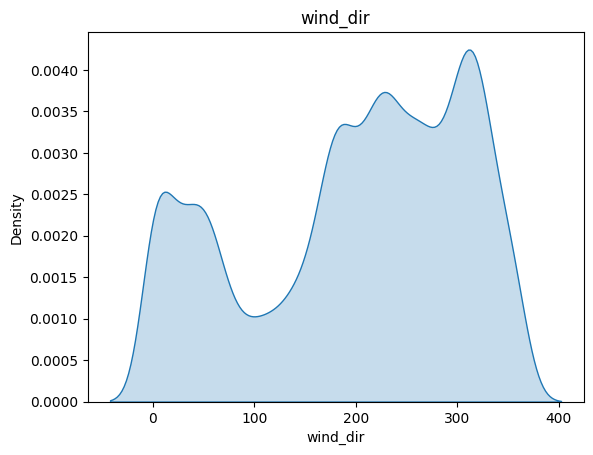

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


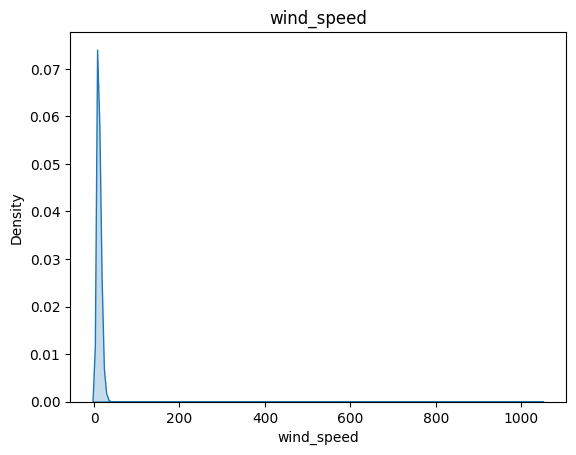

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


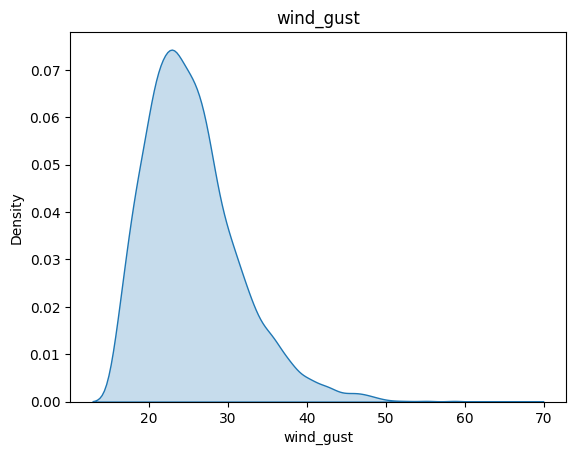

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


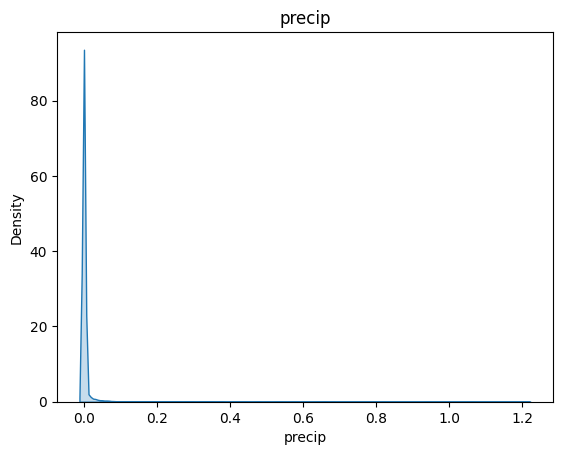

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


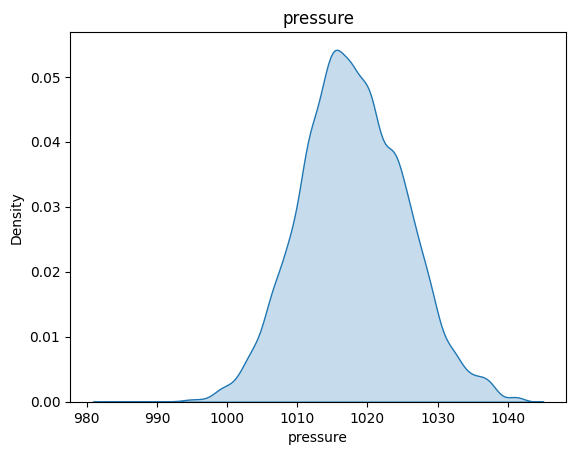

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3757589268.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weather_data[var], shade=True)


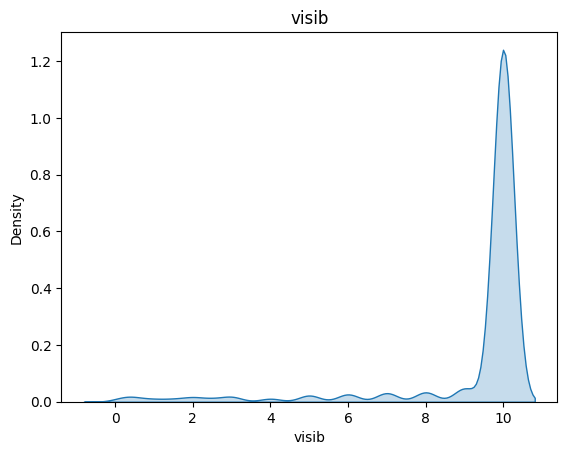

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'df' es tu DataFrame

# a. Indicar la cantidad de filas y columnas
num_filas = weather_data.shape[0]
num_columnas = weather_data.shape[1]
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

# b. Indicar cuantas y cuales son las variables categoricas, continuas, discretas y de fecha y hora.
variables_categoricas = weather_data.select_dtypes(include=['object']).columns
variables_continuas = weather_data.select_dtypes(include=['float64']).columns
variables_discretas = weather_data.select_dtypes(include=['int64']).columns
variables_fecha_hora = weather_data.select_dtypes(include=['datetime64']).columns

print(f'Variables categóricas: {variables_categoricas}')
print(f'Variables continuas: {variables_continuas}')
print(f'Variables discretas: {variables_discretas}')
print(f'Variables de fecha y hora: {variables_fecha_hora}')

# c. Muestre una gráfica
# i. de barras para la cantidad de las variables categoricas y discretas.
for var in variables_categoricas.tolist() + variables_discretas.tolist():
    weather_data[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()

# ii. De densidad para las variables continuas.
for var in variables_continuas:
    sns.kdeplot(weather_data[var], shade=True)
    plt.title(var)
    plt.show()

# iii. Serie de tiempo con el conteo de apariciones para las de fecha y hora.
for var in variables_fecha_hora:
    weather_data[var].value_counts().resample('M').sum().plot()
    plt.title(var)
    plt.show()


Número de filas: 3322
Número de columnas: 9
Variables categóricas: Index(['tailnum', 'type', 'manufacturer', 'model', 'engine'], dtype='object')
Variables continuas: Index(['year', 'speed'], dtype='object')
Variables discretas: Index(['engines', 'seats'], dtype='object')
Variables de fecha y hora: Index([], dtype='object')


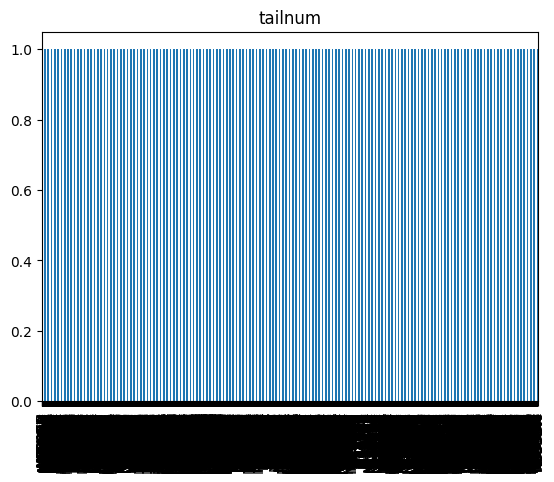

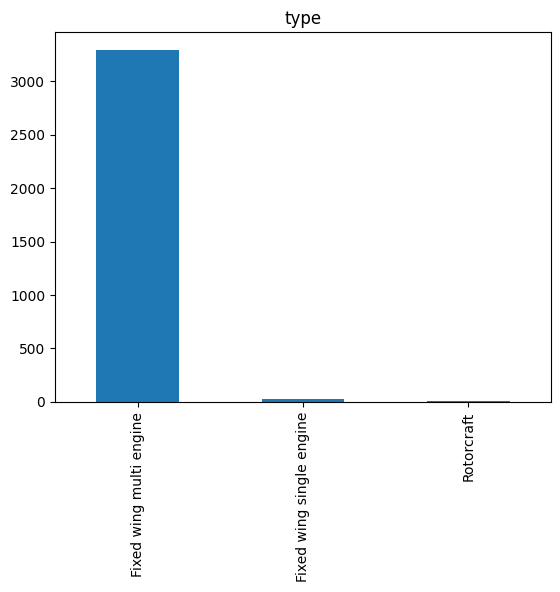

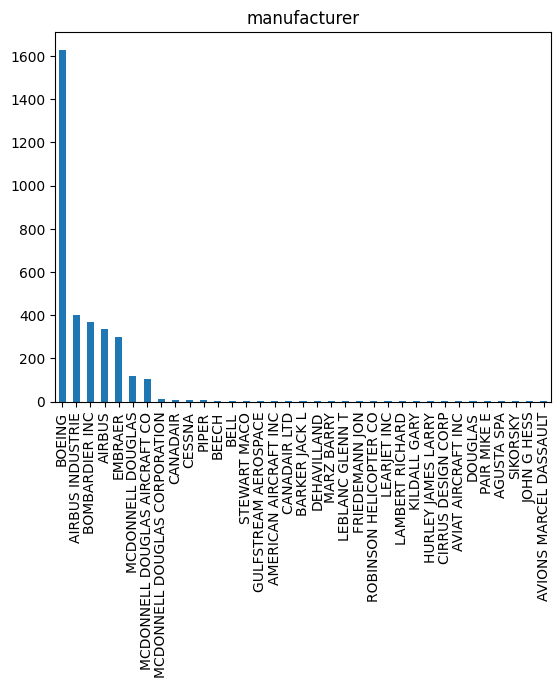

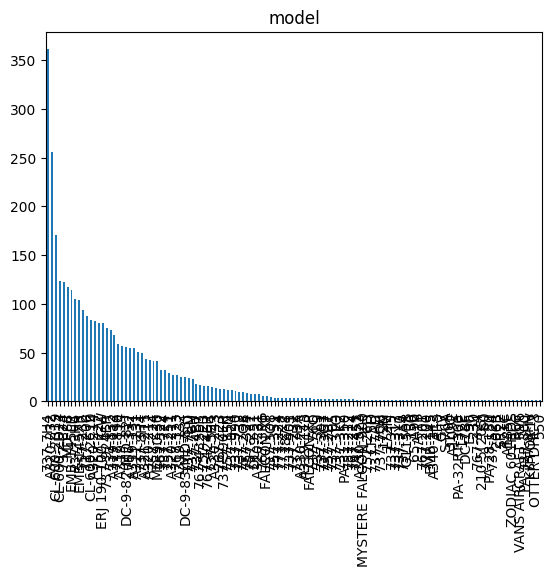

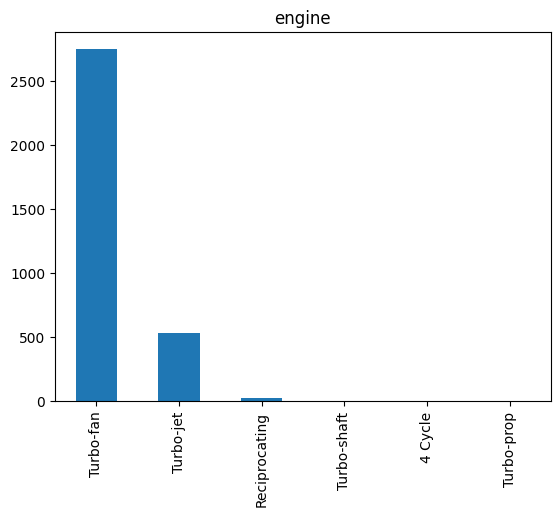

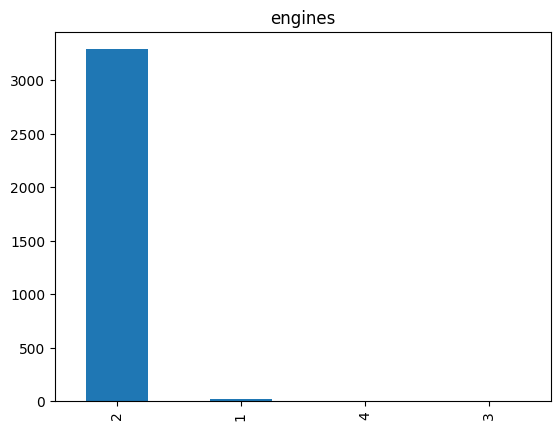

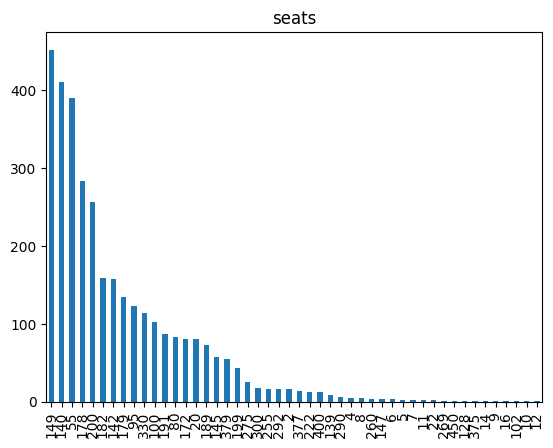

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3295423756.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(planes_data[var], shade=True)


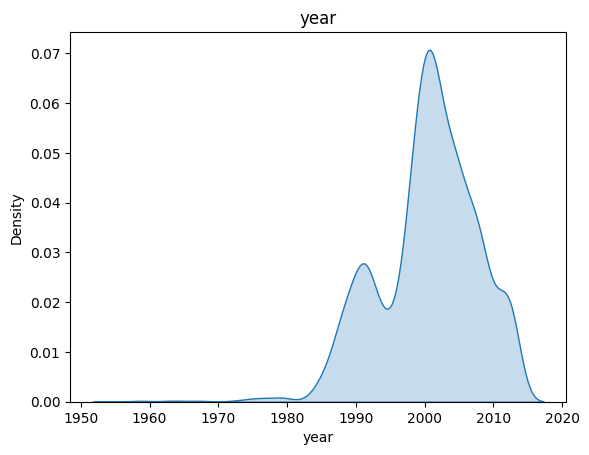

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3295423756.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(planes_data[var], shade=True)


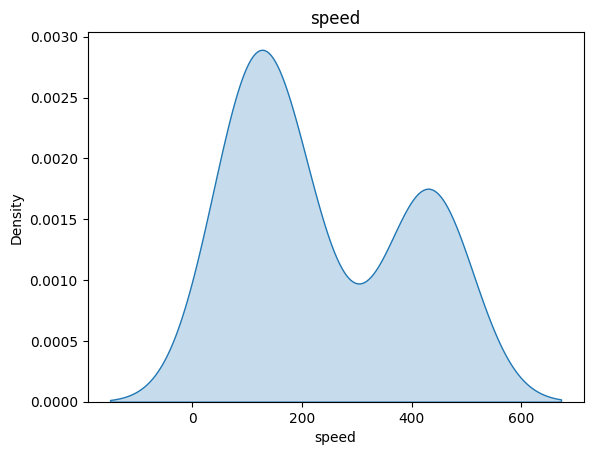

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'df' es tu DataFrame

# a. Indicar la cantidad de filas y columnas
num_filas = planes_data.shape[0]
num_columnas = planes_data.shape[1]
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

# b. Indicar cuantas y cuales son las variables categoricas, continuas, discretas y de fecha y hora.
variables_categoricas = planes_data.select_dtypes(include=['object']).columns
variables_continuas = planes_data.select_dtypes(include=['float64']).columns
variables_discretas = planes_data.select_dtypes(include=['int64']).columns
variables_fecha_hora = planes_data.select_dtypes(include=['datetime64']).columns

print(f'Variables categóricas: {variables_categoricas}')
print(f'Variables continuas: {variables_continuas}')
print(f'Variables discretas: {variables_discretas}')
print(f'Variables de fecha y hora: {variables_fecha_hora}')

# c. Muestre una gráfica
# i. de barras para la cantidad de las variables categoricas y discretas.
for var in variables_categoricas.tolist() + variables_discretas.tolist():
    planes_data[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()

# ii. De densidad para las variables continuas.
for var in variables_continuas:
    sns.kdeplot(planes_data[var], shade=True)
    plt.title(var)
    plt.show()

# iii. Serie de tiempo con el conteo de apariciones para las de fecha y hora.
for var in variables_fecha_hora:
    planes_data[var].value_counts().resample('M').sum().plot()
    plt.title(var)
    plt.show()


Número de filas: 16
Número de columnas: 2
Variables categóricas: Index(['carrier', 'name'], dtype='object')
Variables continuas: Index([], dtype='object')
Variables discretas: Index([], dtype='object')
Variables de fecha y hora: Index([], dtype='object')


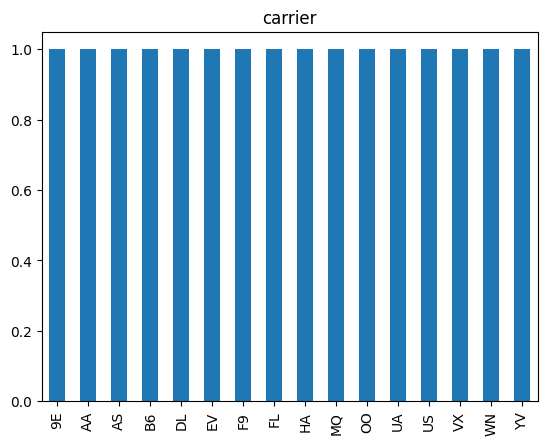

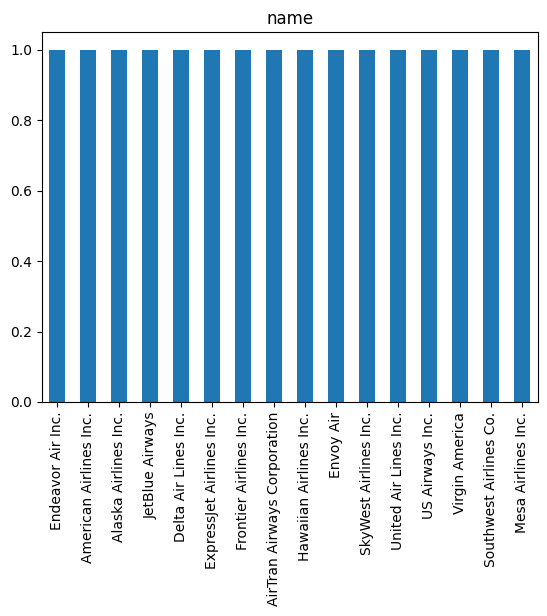

In [ ]:
# a. Indicar la cantidad de filas y columnas
num_filas = airlines_data.shape[0]
num_columnas = airlines_data.shape[1]
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

# b. Indicar cuantas y cuales son las variables categoricas, continuas, discretas y de fecha y hora.
variables_categoricas = airlines_data.select_dtypes(include=['object']).columns
variables_continuas = airlines_data.select_dtypes(include=['float64']).columns
variables_discretas = airlines_data.select_dtypes(include=['int64']).columns
variables_fecha_hora = airlines_data.select_dtypes(include=['datetime64']).columns

print(f'Variables categóricas: {variables_categoricas}')
print(f'Variables continuas: {variables_continuas}')
print(f'Variables discretas: {variables_discretas}')
print(f'Variables de fecha y hora: {variables_fecha_hora}')

# c. Muestre una gráfica
# i. de barras para la cantidad de las variables categoricas y discretas.
for var in variables_categoricas.tolist() + variables_discretas.tolist():
    airlines_data[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()

# ii. De densidad para las variables continuas.
for var in variables_continuas:
    sns.kdeplot(airlines_data[var], shade=True)
    plt.title(var)
    plt.show()

# iii. Serie de tiempo con el conteo de apariciones para las de fecha y hora.
for var in variables_fecha_hora:
    airlines_data[var].value_counts().resample('M').sum().plot()
    plt.title(var)
    plt.show()


Número de filas: 1458
Número de columnas: 8
Variables categóricas: Index(['faa', 'name', 'dst', 'tzone'], dtype='object')
Variables continuas: Index(['lat', 'lon'], dtype='object')
Variables discretas: Index(['alt', 'tz'], dtype='object')
Variables de fecha y hora: Index([], dtype='object')


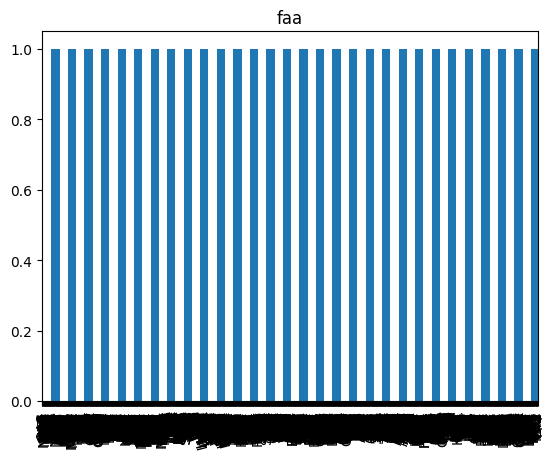

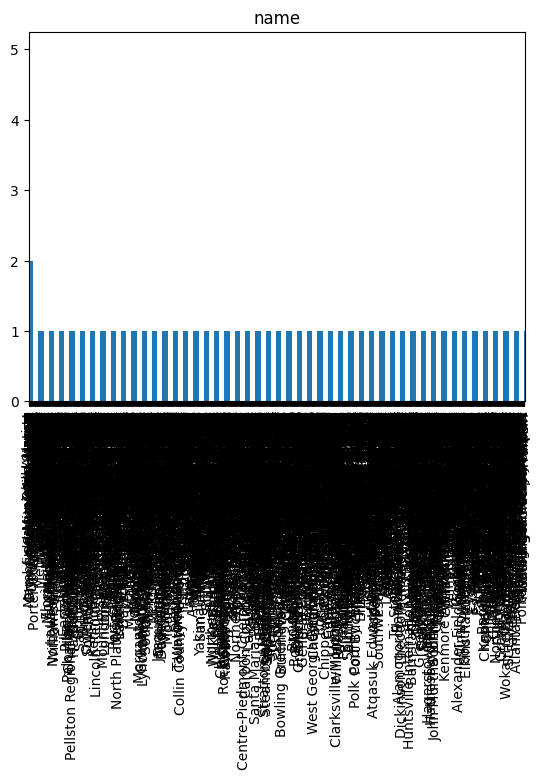

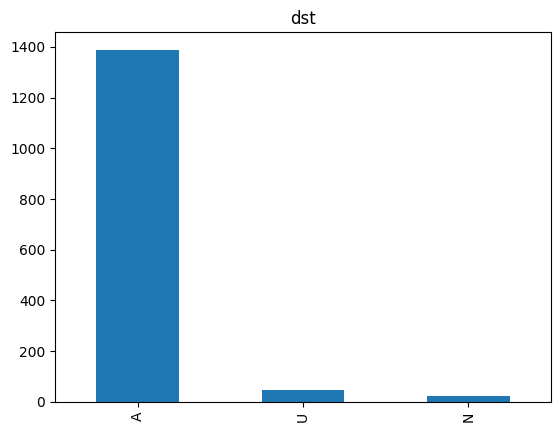

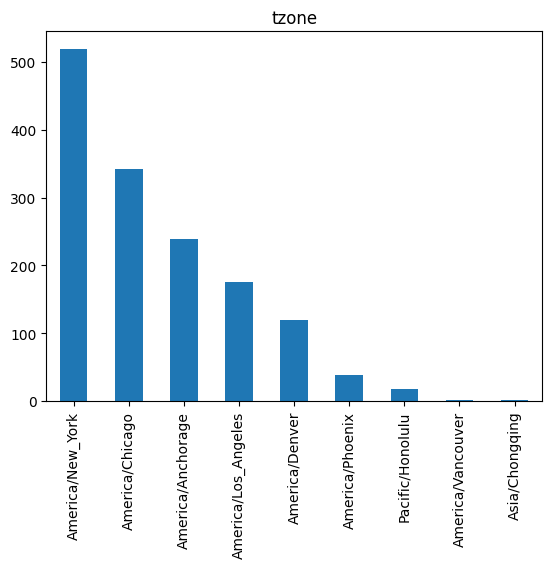

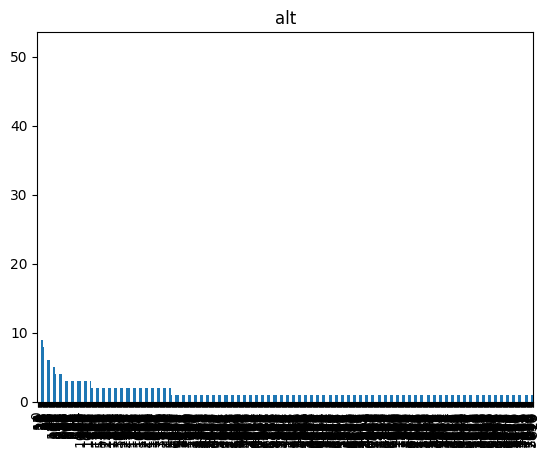

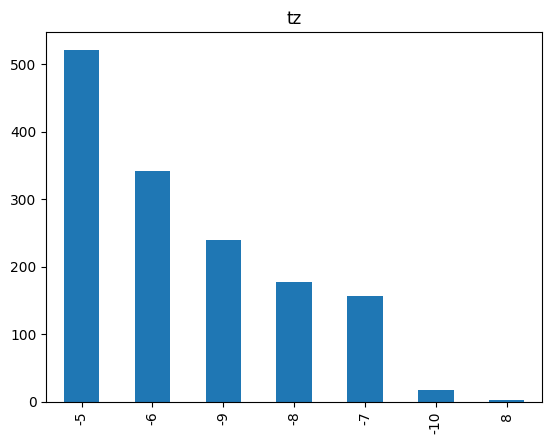

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\1375422987.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airports_data[var], shade=True)


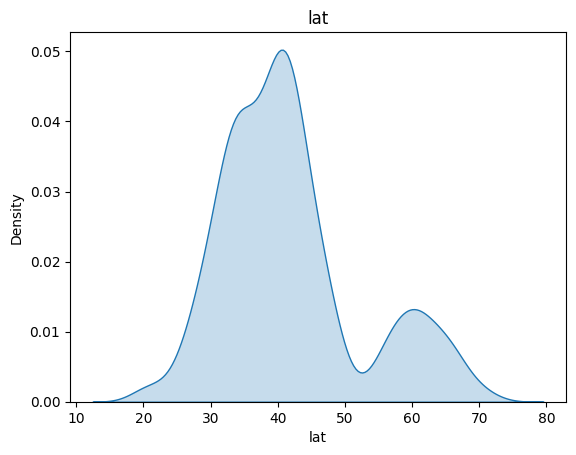

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\1375422987.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airports_data[var], shade=True)


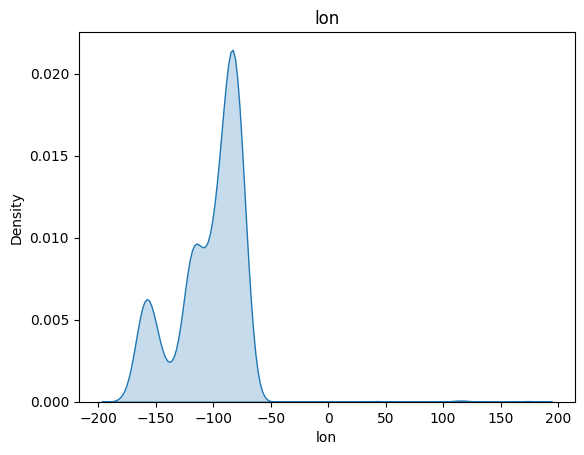

In [ ]:
# a. Indicar la cantidad de filas y columnas
num_filas = airports_data.shape[0]
num_columnas = airports_data.shape[1]
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

# b. Indicar cuantas y cuales son las variables categoricas, continuas, discretas y de fecha y hora.
variables_categoricas = airports_data.select_dtypes(include=['object']).columns
variables_continuas = airports_data.select_dtypes(include=['float64']).columns
variables_discretas = airports_data.select_dtypes(include=['int64']).columns
variables_fecha_hora = airports_data.select_dtypes(include=['datetime64']).columns

print(f'Variables categóricas: {variables_categoricas}')
print(f'Variables continuas: {variables_continuas}')
print(f'Variables discretas: {variables_discretas}')
print(f'Variables de fecha y hora: {variables_fecha_hora}')

# c. Muestre una gráfica
# i. de barras para la cantidad de las variables categoricas y discretas.
for var in variables_categoricas.tolist() + variables_discretas.tolist():
    airports_data[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()

# ii. De densidad para las variables continuas.
for var in variables_continuas:
    sns.kdeplot(airports_data[var], shade=True)
    plt.title(var)
    plt.show()

# iii. Serie de tiempo con el conteo de apariciones para las de fecha y hora.
for var in variables_fecha_hora:
    airports_data[var].value_counts().resample('M').sum().plot()
    plt.title(var)
    plt.show()


Número de filas: 336776
Número de columnas: 19
Variables categóricas: Index(['carrier', 'tailnum', 'origin', 'dest', 'time_hour'], dtype='object')
Variables continuas: Index(['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time'], dtype='object')
Variables discretas: Index(['year', 'month', 'day', 'sched_dep_time', 'sched_arr_time', 'flight',
       'distance', 'hour', 'minute'],
      dtype='object')
Variables de fecha y hora: Index([], dtype='object')


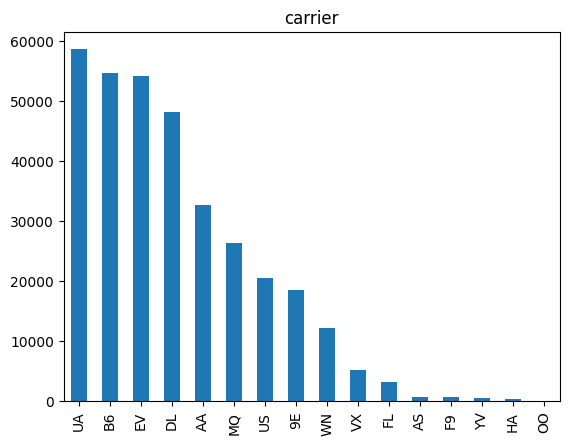

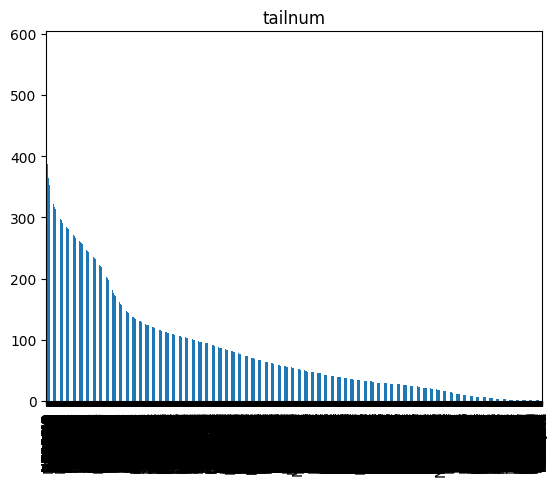

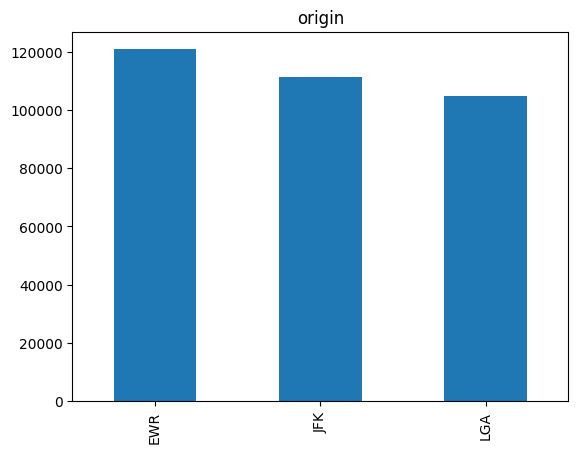

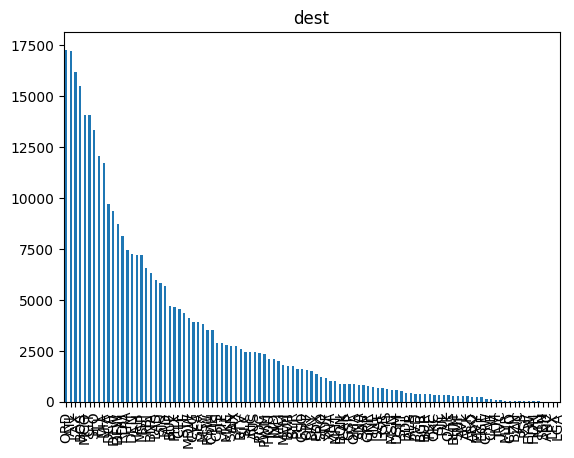

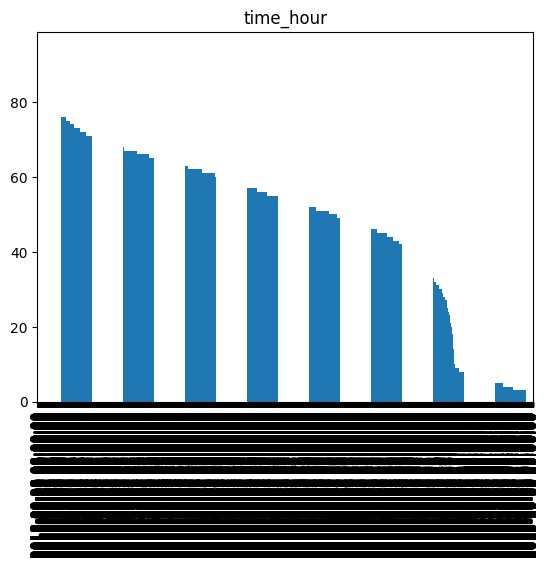

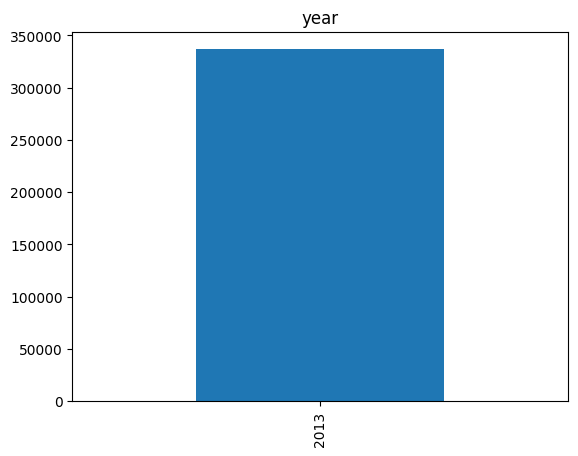

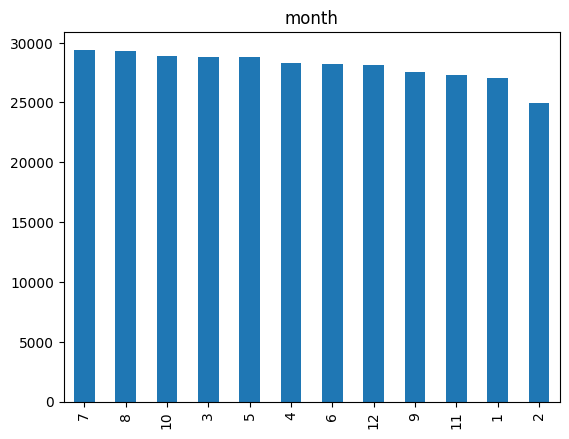

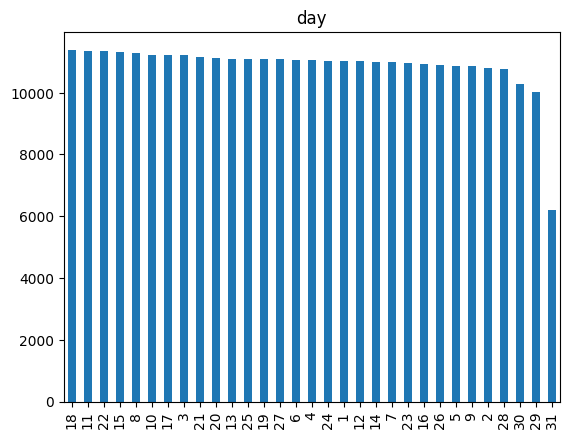

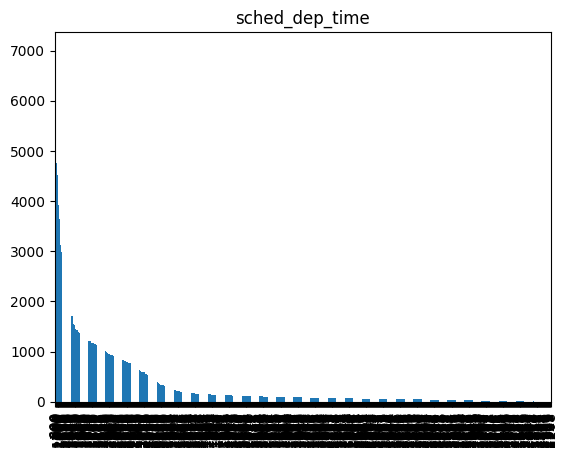

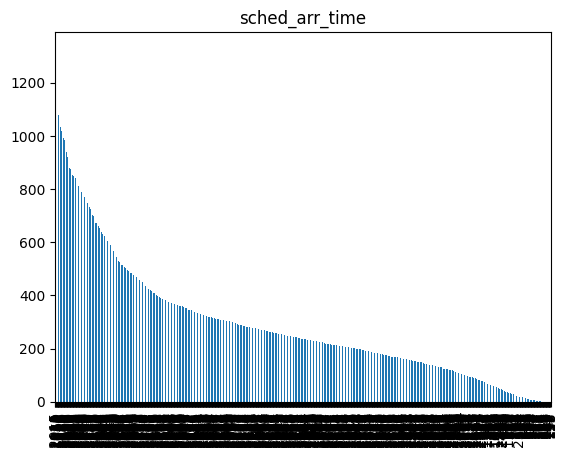

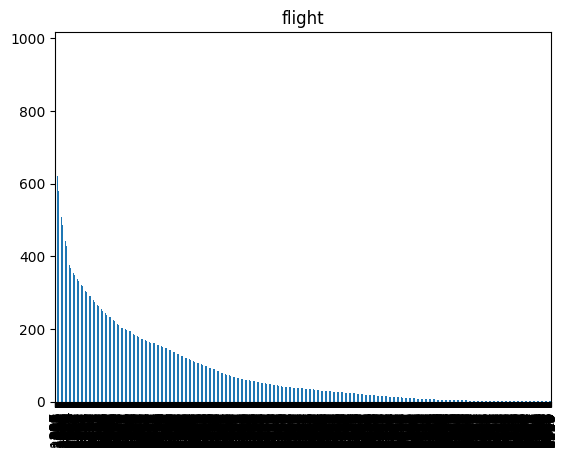

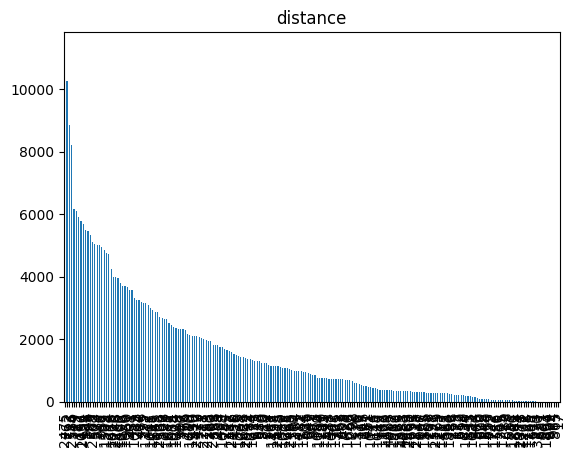

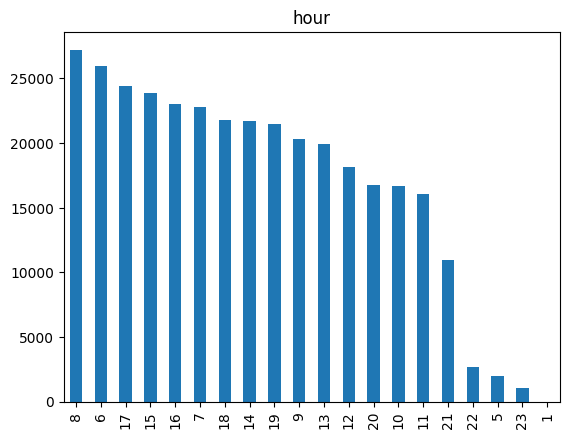

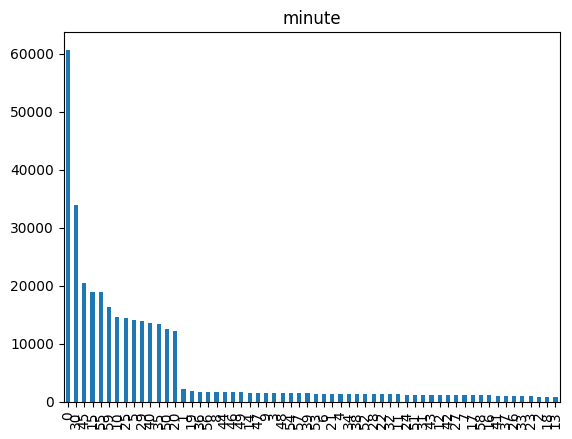

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\2108818944.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(flights_data[var], shade=True)


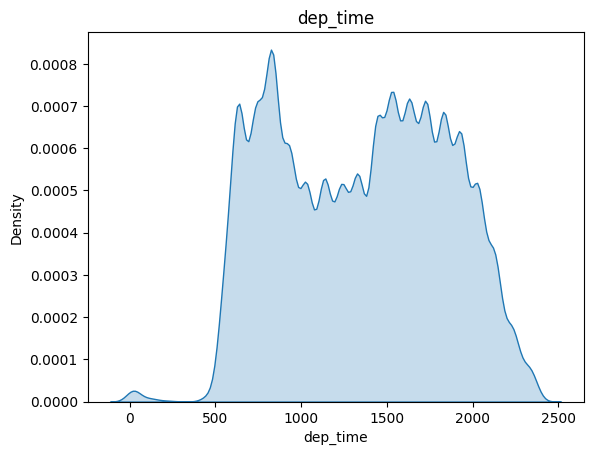

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\2108818944.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(flights_data[var], shade=True)


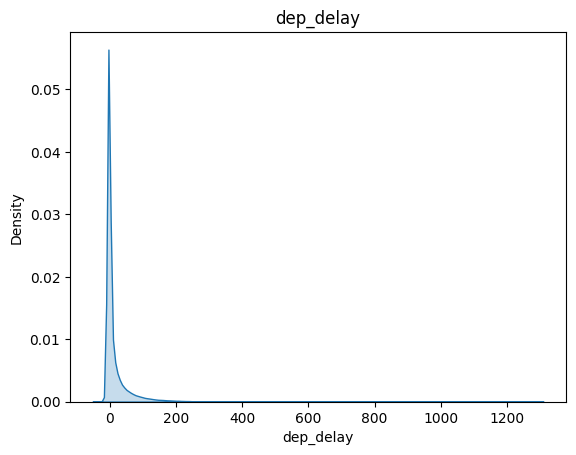

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\2108818944.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(flights_data[var], shade=True)


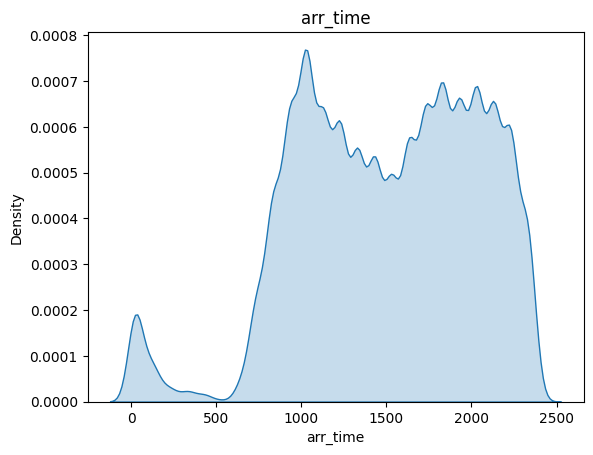

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\2108818944.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(flights_data[var], shade=True)


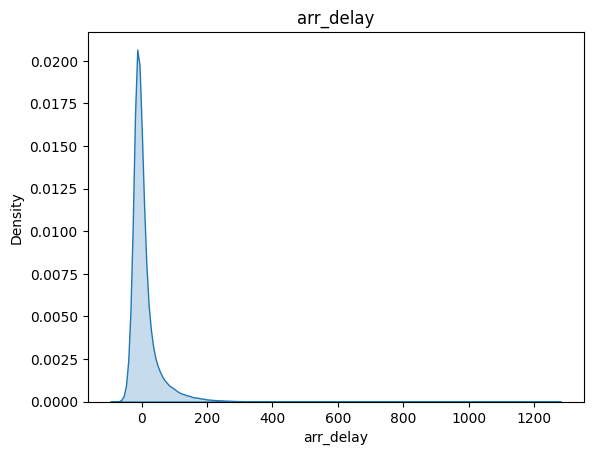

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\2108818944.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(flights_data[var], shade=True)


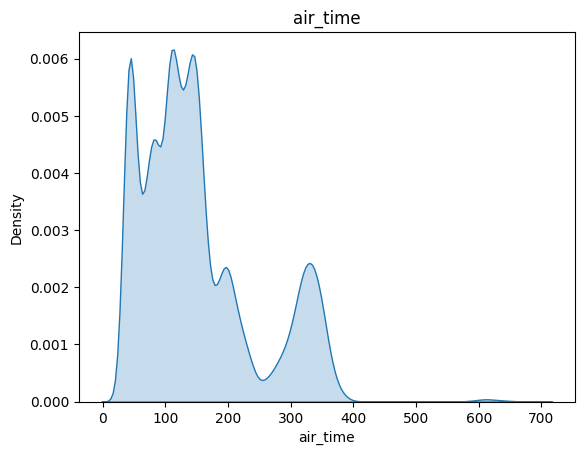

In [ ]:
# a. Indicar la cantidad de filas y columnas
num_filas = flights_data.shape[0]
num_columnas = flights_data.shape[1]
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

# b. Indicar cuantas y cuales son las variables categoricas, continuas, discretas y de fecha y hora.
variables_categoricas = flights_data.select_dtypes(include=['object']).columns
variables_continuas = flights_data.select_dtypes(include=['float64']).columns
variables_discretas = flights_data.select_dtypes(include=['int64']).columns
variables_fecha_hora = flights_data.select_dtypes(include=['datetime64']).columns

print(f'Variables categóricas: {variables_categoricas}')
print(f'Variables continuas: {variables_continuas}')
print(f'Variables discretas: {variables_discretas}')
print(f'Variables de fecha y hora: {variables_fecha_hora}')

# c. Muestre una gráfica
# i. de barras para la cantidad de las variables categoricas y discretas.
for var in variables_categoricas.tolist() + variables_discretas.tolist():
    flights_data[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()

# ii. De densidad para las variables continuas.
for var in variables_continuas:
    sns.kdeplot(flights_data[var], shade=True)
    plt.title(var)
    plt.show()

# iii. Serie de tiempo con el conteo de apariciones para las de fecha y hora.
for var in variables_fecha_hora:
    flights_data[var].value_counts().resample('M').sum().plot()
    plt.title(var)
    plt.show()


### Preguntas para proyecto

1. ¿Que aeropuerto 'dest' tiene el mayor arr_delay, debe colocar el nombre del aeropuerto?
2. ¿Que Manufacturer tiene mas aviones en circulacion y cual es el modelo mas utilizado?
3. ¿En que aerorpuertos es común que la velocidad del viento sobrepase los 55km/hr?
4. ¿Que aeropuerto tiene la menor cantidad de retrasos en la salida?
5. ¿Que aerolinea tiene el mejor promedio de tiempo de llegada?
6. ¿Cuál es el vuelo con la distiancia mas larga recorrida y que sea el mas solicitado?
7. ¿Son muy evidentes los cambios de temp o se mantienen estables?
8. ¿Que aeropuerto tiene la mayor cantidad de salidas?
9. ¿Cual es el aeropuerto que recibe a mas aerolineas?
10. ¿Distancia recorrida por cada avion y su año de fabricacion?

### 1. ¿Que aeropuerto 'dest' tiene el mayor arr_delay, debe colocar el nombre del aeropuerto?


In [122]:
df_airport_flights= df_airports.merge(df_flights4,left_on='faa',right_on='dest',how='left' )
df_airport_flights

,tzone,faa,name,dest,dep_delay,arr_delay,distance,carrier,tailnum
0,America/New_York,04G,Lansdowne Airport,NaN,NaN,NaN,NaN,NaN,NaN
1,America/Chicago,06A,Moton Field Municipal Airport,NaN,NaN,NaN,NaN,NaN,NaN
2,America/Chicago,06C,Schaumburg Regional,NaN,NaN,NaN,NaN,NaN,NaN
3,America/New_York,06N,Randall Airport,NaN,NaN,NaN,NaN,NaN,NaN
4,America/New_York,09J,Jekyll Island Airport,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
330526,America/Denver,ZUN,Black Rock,NaN,NaN,NaN,NaN,NaN,NaN
330527,America/New_York,ZVE,New Haven Rail Station,NaN,NaN,NaN,NaN,NaN,NaN
330528,America/New_York,ZWI,Wilmington Amtrak Station,NaN,NaN,NaN,NaN,NaN,NaN
330529,America/New_York,ZWU,Washington Union Station,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
idx_max_arr = df_airport_flights['arr_delay'].idxmax()
faa_max_arr_airport = df_airport_flights.loc[idx_max_arr, 'faa']
faa_max_arr_airport

'HNL'

In [87]:
# Assuming 'df' is your DataFrame
idx_max_arr_d = df_airport_flights.loc[df_airport_flights['arr_delay'].idxmax()]

print(idx_max_arr_d)


tzone        Pacific/Honolulu
faa                       HNL
name            Honolulu Intl
dest                      HNL
arr_delay              1272.0
distance               4983.0
carrier                    HA
tailnum                N384HA
Name: 136749, dtype: object


### 2. ¿Que Manufacturer tiene mas aviones en circulacion y cual es el modelo mas utilizado?

In [120]:
sql_query= 'Select dest,dep_delay, arr_delay,distance,carrier, tailnum from flights'
df_flights4= pd.read_sql(sql_query,conn)
df_flights4.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\1987096071.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_flights4= pd.read_sql(sql_query,conn)


,dest,dep_delay,arr_delay,distance,carrier,tailnum
0,IAH,2.0,11.0,1400,UA,N14228
1,IAH,4.0,20.0,1416,UA,N24211
2,MIA,2.0,33.0,1089,AA,N619AA
3,BQN,-1.0,-18.0,1576,B6,N804JB
4,ATL,-6.0,-25.0,762,DL,N668DN


In [103]:
df_planes_circulacion= planes_data.groupby(['manufacturer','model']).size().idxmax()
df_planes_circulacion

('BOEING', '737-7H4')


### 3. ¿En que aerorpuertos es común que la velocidad del viento sobrepase los 55km/hr?

In [118]:
df_aeropuertos_viento_alto = df_we_air[df_we_air['wind_speed'] > 55]

# Mostramos los aeropuertos resultantes
print(df_aeropuertos_viento_alto['name'].unique())

['Newark Liberty Intl']


### 4. ¿Que aeropuerto tiene la menor cantidad de retrasos en la salida?

In [125]:
df_dep_delay= df_airport_flights[df_airport_flights['dep_delay']<=0]
df_dep_delay

,tzone,faa,name,dest,dep_delay,arr_delay,distance,carrier,tailnum
87,America/Denver,ABQ,Albuquerque International Sunport,ABQ,-6.0,-35.0,1826.0,B6,N554JB
89,America/Denver,ABQ,Albuquerque International Sunport,ABQ,-6.0,-16.0,1826.0,B6,N591JB
91,America/Denver,ABQ,Albuquerque International Sunport,ABQ,0.0,-20.0,1826.0,B6,N580JB
92,America/Denver,ABQ,Albuquerque International Sunport,ABQ,-2.0,-14.0,1826.0,B6,N507JB
94,America/Denver,ABQ,Albuquerque International Sunport,ABQ,-4.0,-32.0,1826.0,B6,N775JB
...,...,...,...,...,...,...,...,...,...
330499,America/Chicago,XNA,NW Arkansas Regional,XNA,-1.0,4.0,1147.0,MQ,N725MQ
330500,America/Chicago,XNA,NW Arkansas Regional,XNA,-6.0,-29.0,1147.0,MQ,N735MQ
330501,America/Chicago,XNA,NW Arkansas Regional,XNA,-6.0,-17.0,1131.0,EV,N14117
330502,America/Chicago,XNA,NW Arkansas Regional,XNA,-1.0,-14.0,1147.0,MQ,N725MQ


In [141]:
df_dep_delay_group= df_dep_delay.groupby(['name', 'faa']).agg('mean')
min_dep_delay=df_dep_delay_group['dep_delay'].min()
air_min_delay = df_dep_delay_group['dep_delay'].idxmin()
print(f"Minimum departure delay: {min_dep_delay}")
print(f"Airport with minimum departure delay: {air_min_delay}")

Minimum departure delay: -9.0
Airport with minimum departure delay: ('Blue Grass', 'LEX')


C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\3871902684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dep_delay_group= df_dep_delay.groupby(['name', 'faa']).agg('mean')


### 5. ¿Que aerolinea tiene el mejor promedio de tiempo de llegada?

In [148]:
mejor_promedio= df_dep_delay.groupby('name').agg('mean')
min_arrdelay_mean=mejor_promedio['arr_delay'].min()
min_arrdelay_name = mejor_promedio['arr_delay'].idxmin()
print(f"Minimum departure delay: {min_arrdelay_mean}")
print(f"Airport with minimum departure delay: {min_arrdelay_name}")

Minimum departure delay: -22.0
Airport with minimum departure delay: Blue Grass


C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\1890037764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mejor_promedio= df_dep_delay.groupby('name').agg('mean')


### 6. ¿Cuál es el vuelo con la distiancia mas larga recorrida y que sea el mas solicitado?

In [163]:
Vuelo_mas_solicitado= df_flights3.value_counts()
Vuelo_mas_solicitado

tailnum  distance
N328AA   2475        313
N338AA   2475        286
N327AA   2475        280
N335AA   2475        275
N323AA   2475        265
                    ... 
N362NB   1587          1
         1182          1
N701GS   1605          1
         1411          1
N633JB   1023          1
Length: 52229, dtype: int64

### 7. ¿Son muy evidentes los cambios de temp o se mantienen estables?

C:\Users\juanp\AppData\Local\Temp\ipykernel_12752\716990147.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_weather['temp'], shade=True)


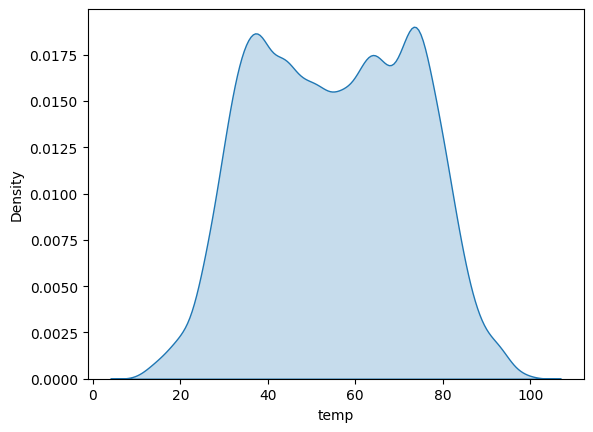

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame y 'temperatura' es la columna con los datos de temperatura.

# Crea el gráfico de densidad
sns.kdeplot(df_weather['temp'], shade=True)

# Muestra el gráfico
plt.show()


### 8. ¿Que aeropuerto tiene la mayor cantidad de salidas?

In [172]:
flights_data.groupby('origin').size()

origin
EWR    120835
JFK    111279
LGA    104662
dtype: int64

### 9. ¿Cual es el aeropuerto que recibe a mas aerolineas?

In [183]:
num_aerolineas_por_aeropuerto = df_air_flight.groupby('origin')['name'].nunique()

print(num_aerolineas_por_aeropuerto)


origin
EWR    12
JFK    10
LGA    13
Name: name, dtype: int64


### 10. ¿Distancia recorrida por cada avion y su año de fabricacion?

In [190]:
df_planes_flights3= df_planes.merge(df_flights3, left_on= 'tailnum',right_on= 'tailnum', how='inner')
df_planes_flights3

,tailnum,year,distance
0,N10156,2004,319
1,N10156,2004,628
2,N10156,2004,1008
3,N10156,2004,463
4,N10156,2004,1092
...,...,...,...
284165,N999DN,1992,762
284166,N999DN,1992,762
284167,N999DN,1992,762
284168,N999DN,1992,762


In [191]:
distancia_x_año= df_planes_flights3.groupby(['tailnum','year']).sum('distance')
distancia_x_año

,,distance
tailnum,year,
N10156,2004,115966
N102UW,1998,25722
N103US,1999,24619
N104UW,1999,25157
N10575,2002,150194
...,...,...
N997AT,2002,29878
N997DL,1992,54669
N998AT,2002,15432
